# Investigating Police Shootings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

police_killings = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")

In [2]:
police_killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

Printing first few columns of data

In [3]:
police_killings.head(3)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312


** Printing to see deaths by ethnicity **

In [4]:
counts = police_killings.raceethnicity.value_counts()

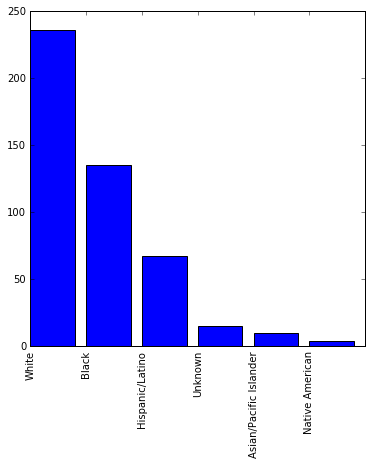

In [5]:
import numpy as np

locs = np.arange(0, police_killings.raceethnicity.nunique())

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

ax.bar(left=locs,height=counts)
ax.set_xticklabels(counts.index,rotation=90)

plt.show()

Let's look at the percentages for each ethnicity

In [6]:
counts / sum(counts) * 100

White                     50.535332
Black                     28.907923
Hispanic/Latino           14.346895
Unknown                    3.211991
Asian/Pacific Islander     2.141328
Native American            0.856531
Name: raceethnicity, dtype: float64

## Studying shootings by regional income

In [7]:
police_killings["income"] = police_killings.p_income[police_killings.p_income != '-'].astype(int)

Plotting a histogram to see income data

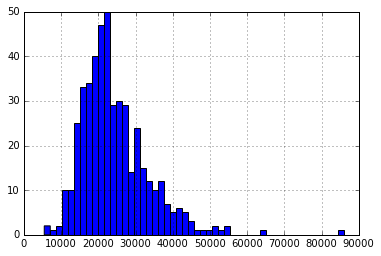

In [8]:
police_killings.income.hist(bins=50)

** Median income of those killed in police shootings **

In [9]:
police_killings.income.median()

22348.0

## Shootings by State

In [10]:
state_pop = pd.read_csv("state_population.csv")
state_pop.head(2)

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3


In [11]:
counts2 = police_killings.state_fp.value_counts()

In [12]:
# Creating a series where index is code for state 
# and value are number of police killings in each state
counts2 = police_killings.state_fp.value_counts()

In [13]:
states = pd.DataFrame({"STATE": counts2.index, "shootings": counts2})

In [14]:
states = states.merge(state_pop, on="STATE")

In [15]:
# Population in terms of millions
states["pop_millions"] = states["POPESTIMATE2015"] / 1000000

** Looking at shooting rates by state **

In [16]:
states["rate"] = states["shootings"] / states["pop_millions"]
states.sort("rate")

/Users/aniruddhabarapatre1/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
43,9,1,40,1,1,Connecticut,3590886,2826827,78.7,3.590886,0.278483
22,42,7,40,1,2,Pennsylvania,12802503,10112229,79.0,12.802503,0.546768
38,19,2,40,2,4,Iowa,3123899,2395103,76.7,3.123899,0.640226
6,36,13,40,1,2,New York,19795791,15584974,78.7,19.795791,0.656705
29,25,5,40,1,1,Massachusetts,6794422,5407335,79.6,6.794422,0.735898
42,33,1,40,1,1,New Hampshire,1330608,1066610,80.2,1.330608,0.751536
45,23,1,40,1,1,Maine,1329328,1072948,80.7,1.329328,0.752260
11,17,11,40,2,3,Illinois,12859995,9901322,77.0,12.859995,0.855366
12,39,10,40,2,3,Ohio,11613423,8984946,77.4,11.613423,0.861073
31,55,5,40,2,3,Wisconsin,5771337,4476711,77.6,5.771337,0.866350


States in Midwest and South have higher police shooting fatalities.

## State by State differences

In [17]:
pk = police_killings[(police_killings['share_white'] != '-') &
                    (police_killings['share_black'] != '-') &
                    (police_killings['share_hispanic'] != '-')]
pk["share_hispanic"] = pk["share_hispanic"].astype(float)
pk["share_white"] = pk["share_white"].astype(float)
pk["share_black"] = pk["share_black"].astype(float)

/Users/aniruddhabarapatre1/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/aniruddhabarapatre1/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/aniruddhabarapatre1/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [18]:
# Creating 10 lowest and highest states list for police shootings
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

In [19]:
ls = pk[pk.state.isin(lowest_states)]
hs = pk[pk.state.isin(highest_states)]

In [20]:
compare_columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

In [23]:
ls[compare_columns].describe()

,pop,county_income,share_white,share_black,share_hispanic
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,4201.660714,54830.839286,60.616071,21.257143,12.948214
std,1428.970300,12451.547261,32.556947,27.770657,15.296417
min,1271.000000,34388.000000,0.000000,0.000000,0.000000
25%,3299.250000,46085.000000,39.650000,2.100000,1.850000
50%,4121.500000,52930.000000,72.950000,9.150000,6.200000
75%,4928.250000,59112.000000,87.800000,25.125000,20.075000
max,8222.000000,87763.000000,97.200000,98.900000,71.900000


In [22]:
hs[compare_columns].describe()

,pop,county_income,share_white,share_black,share_hispanic
count,92.000000,92.000000,92.000000,92.000000,92.000000
mean,4315.750000,48706.967391,55.652174,11.532609,20.693478
std,2063.723609,9839.206872,24.406158,19.591303,20.415690
min,403.000000,25498.000000,2.100000,0.000000,0.000000
25%,2886.000000,42987.000000,39.175000,0.675000,4.350000
50%,4257.500000,48801.000000,58.200000,2.700000,10.850000
75%,5377.000000,53596.000000,74.200000,11.550000,31.725000
max,13561.000000,77454.000000,95.900000,93.100000,81.500000


## Inferences

States with high hispanic population has higher shooting rate.

Also, states with low shooting rates have low hispanic population percentage and high black population percentage.